In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
print("environment test: checked!")

environment test: checked!


# 鲍鱼数据集特征及其含义
**性别（Sex）**：此特征代表鲍鱼的性别，分为雄性（M）、雌性（F）或婴儿（I）。
**长度（Length）**：长度特征表示鲍鱼壳从顶点到底部的最长测量值，以毫米为单位。
**直径（Diameter）**：直径代表鲍鱼壳垂直于其长度的尺寸，也以毫米为单位。
**高度（Height）**：此特征表示鲍鱼壳的高度，垂直于长度和直径形成的平面测量，以毫米为单位。
**全重（Whole weight）**：全重是指鲍鱼的总重量，包括肉和壳，以克为单位。
**整体重量.1（Whole weight.1）**（去壳重量）：此功能仅代表鲍鱼肉的重量，以克为单位。它表示从壳中提取的肉量。
**整体重量。2（Whole weight.2）**（内脏重量）：内脏重量是指放血后鲍鱼内脏的重量，以克为单位。它可以深入了解鲍鱼内脏的重量。
**壳重（Shell weight）** ：该特征仅代表鲍鱼壳的重量，不包括鲍鱼肉，以克为单位。它可以深入了解鲍鱼壳和可食用部分之间的重量分布。
**环（Rings）** ：环是指鲍鱼壳上环的数量，可以作为鲍鱼年龄的指标。

In [2]:
# 导入比赛数据（train,test)以及原始数据（uci-dataset）
train_data = pd.read_csv("./data/playground-series-s4e4/train.csv",index_col="id")
test_data = pd.read_csv("./data/playground-series-s4e4/test.csv",index_col="id")
orig_data = pd.read_csv("./data/abalone/abalone.data")
# 对特征列重命名，主要是区分三个重量
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
orig_data.columns = train_data.columns = columns
test_data.columns = columns[:-1]
train_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


数据集数据分布情况

In [3]:
train_data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


更详细的数据分析&理解 好用的函数

In [4]:
def show_info(dataframe):
    print("***** SHAPE *****")
    print(dataframe.shape)
    print("***** INFO *****")
    print(dataframe.info())
    print("***** NAN *****")
    print(dataframe.isnull().sum())
    print("***** # OF UNIQUE *****")
    print(dataframe.nunique())
    print("***** DESCRIPTIVE STATISTICS *****")
    print(dataframe.describe(include="all").T)

In [5]:
show_info(train_data)

***** SHAPE *****
(90615, 9)
***** INFO *****
<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole_weight    90615 non-null  float64
 5   Shucked_weight  90615 non-null  float64
 6   Viscera_weight  90615 non-null  float64
 7   Shell_weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB
None
***** NAN *****
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64
***** # OF UNIQUE *****
Sex                  3
Length             157
Diameter  

接下来是数据清洗
1. 缺失值处理：填充（如用中位数、均值）、删除或插值。
2. 异常值处理：通过Z-Score、箱型图等方法识别和处理异常值。
3. 噪声数据处理：平滑技术如移动平均或中位数过滤器。

缺失值（NaN),无
异常值，通过Z-Score、箱型图，小提琴图等方法识别和处理异常值。

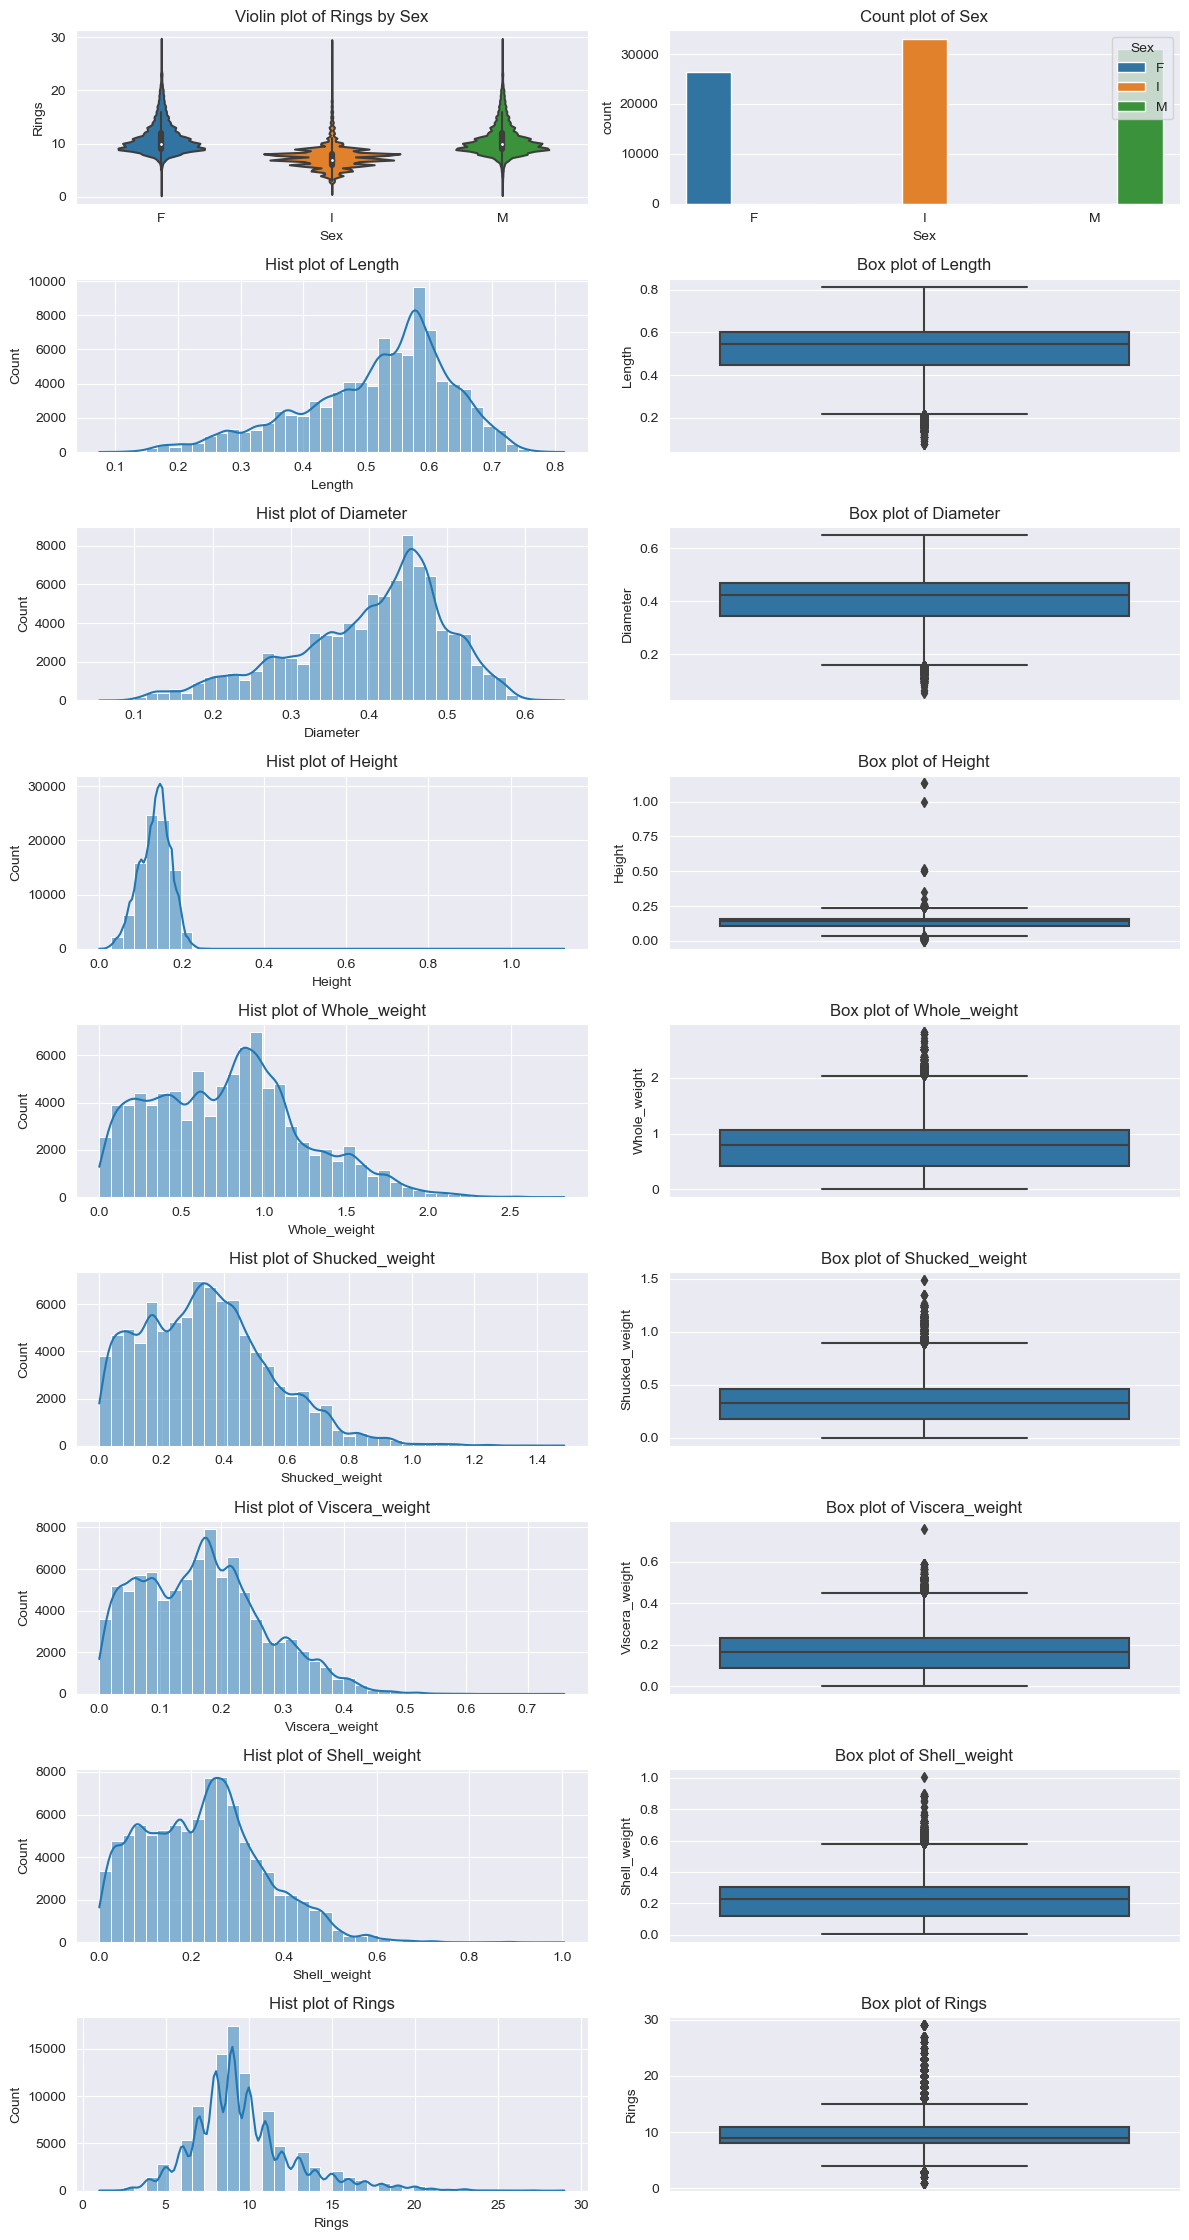

In [15]:
# train_data是您的pandas DataFrame
num_rows, num_cols = 9, 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 22.5))

# 遍历DataFrame的列以创建可视化
for ind, col in enumerate(train_data.columns):
    if col == "Sex":
        # 使用小提琴图显示“Sex”特征与“Rings”特征之间的关系
        violin_ax = plt.subplot(num_rows, num_cols, 2*ind+1)
        sns.violinplot(x=col, y='Rings', data=train_data, ax=violin_ax)
        violin_ax.set_title(f'Violin plot of Rings by {col}')

        # 使用计数图显示“Sex”特征的分布
        count_ax = plt.subplot(num_rows, num_cols, 2*ind+2)
        sns.countplot(x=col, data=train_data, hue=col, ax=count_ax)
        count_ax.set_title(f'Count plot of {col}')

    else:
        # 使用直方图显示数值特征的分布
        hist_ax = plt.subplot(num_rows, num_cols, 2*ind+1)
        sns.histplot(train_data[col], kde=True, bins=40, ax=hist_ax)
        hist_ax.set_title(f'Hist plot of {col}')

        # 使用箱线图显示数值特征的五数概括和异常值
        box_ax = plt.subplot(num_rows, num_cols, 2*ind+2)
        sns.boxplot(y=train_data[col], ax=box_ax)
        box_ax.set_title(f'Box plot of {col}')

# 调整布局以防止重叠
plt.tight_layout()
# 显示图形
plt.show()


Sex值和Rings有明显关联，其他值符合分布，普遍存在过大过小个体，成为异常值
Rings有哪些值?是否不连续？——连续

In [16]:
unique_rings = train_data['Rings'].unique()

# 排序后的列表，可以使用sorted函数
sorted_unique_rings = sorted(unique_rings)
print(sorted_unique_rings)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29]
